In [40]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json

import uproot
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot

In [41]:
with gzip.open("hists_quantile_qcd.pkl.gz") as fin:
    hists = pickle.load(fin)

In [42]:
with gzip.open("hists_quantile_hbb.pkl.gz") as fin2:
    hists2 = pickle.load(fin2)

In [43]:
print(hists)
print(hists2)

{'hjetpt': <Hist (dataset,AK8Puppijet0_isHadronicV,AK8Puppijet0_pt,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f7889703780>}
{'hjetpt': <Hist (dataset,AK8Puppijet0_isHadronicV,AK8Puppijet0_pt,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f78894ff8d0>}


In [44]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset", "AK8Puppijet0_isHadronicV")
process_map = OrderedDict()
#process_map["QCD"] = ("QCD*", slice(None))
#process_map["QCDinV"] = ("Z*", 0)
process_map["Hcc"] = ("GluGluHToCC", 2)
process_map["Hbb"] = ("GluGluHToBB", 3)
process_map["Zqq"] = ("ZJetsToQQ_HT*", 1)
process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
process_map["Top"] = ("TTTo*", slice(None))
process_map["QCD"] = ("QCD*", slice(None))


for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)
    hists2[key] = hists2[key].group(process, process_cats, process_map)

/uscms/home/separk/nobackup/coffea/fnal-column-analysis-tools/fnal_column_analysis_tools/hist/hist_tools.py:478: RuntimeWarning: Allocating a large (>10M bin) histogram!
  warnings.warn("Allocating a large (>10M bin) histogram!", RuntimeWarning)


In [45]:
x = hists['hjetpt']
x2 = hists2['hjetpt']

In [46]:
print(x)
print(x2)

<Hist (process,AK8Puppijet0_pt,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f78894230b8>
<Hist (process,AK8Puppijet0_pt,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f7889703780>


In [47]:
y = x.project("AK8Puppijet0_pt", slice(450,None), overflow='over')
y2 = x2.project("AK8Puppijet0_pt", slice(450,None), overflow='over')

In [48]:
print(y)
print(y2)

<Hist (process,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f7889be48d0>
<Hist (process,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f7889be3128>


In [49]:
z = y.sum("jetrho")
z2 = y2.sum("jetrho")

In [50]:
print(z)
print(z2)

<Hist (process,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f7889be3400>
<Hist (process,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f7889c03630>


In [51]:
print(z2.values())

{('Hbb',): array([[3.69240232e-02, 5.98313324e-02, 5.66008091e-02, ...,
        2.42563820e+00, 1.15236032e+00, 1.67479679e-01],
       [2.53635738e-03, 5.57998568e-03, 5.87366894e-03, ...,
        4.36680585e-01, 1.52501822e-01, 1.67933572e-02],
       [1.60190987e-03, 1.76210084e-03, 1.92229170e-03, ...,
        1.23934425e-01, 3.87929119e-02, 3.52420146e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)}


In [52]:
def multidim_cumsum(a):
    out = a[...,::-1].cumsum(1)[...,::-1]
    for i in range(2,a.ndim+1):
        np.cumsum(out, axis=-i, out=out)
    return out

In [53]:
t = z.project("process").values(overflow='allnan')
t2 = z2.project("process").values(overflow='allnan')

In [54]:
background = multidim_cumsum(t[()])
signal = multidim_cumsum(t2[()])

In [55]:
sqrtbkg = np.sqrt(background)

In [56]:
print(sqrtbkg)

[[  0.          0.          0.        ...   0.          0.
    0.       ]
 [567.6862    567.6862    447.73056   ...   5.9441504   2.4704032
    2.4704032]
 [619.311     619.311     487.97156   ...   6.3601346   2.7713764
    2.7713764]
 ...
 [852.5848    852.5848    669.4535    ...   8.761923    4.135974
    4.135974 ]
 [946.6073    946.6073    744.1642    ...   9.618442    4.6716194
    4.6716194]
 [946.6073    946.6073    744.1642    ...   9.618442    4.6716194
    4.6716194]]


In [57]:
soverb = signal/(sqrtbkg+1)
print(soverb)
norm_soverb = soverb/np.amax(soverb)
print(norm_soverb)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.6055913e-02 2.6055913e-02 3.2938950e-02 ... 2.4145009e-02
  5.3852385e-05 5.3852385e-05]
 [2.8270723e-02 2.8270723e-02 3.5783634e-02 ... 2.5065659e-02
  5.6633962e-05 5.6633962e-05]
 ...
 [2.2611083e-02 2.2611083e-02 2.8720930e-02 ... 1.9497553e-02
  5.1983319e-05 5.1983319e-05]
 [2.0367589e-02 2.0367589e-02 2.5841350e-02 ... 1.7924815e-02
  4.7073852e-05 4.7073852e-05]
 [2.0367589e-02 2.0367589e-02 2.5841350e-02 ... 1.7924815e-02
  4.7073852e-05 4.7073852e-05]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.15546449 0.15546449 0.19653262 ... 0.14406294 0.00032131 0.00032131]
 [0.16867931 0.16867931 0.21350563 ... 0.14955606 0.00033791 0.00033791]
 ...
 [0.13491066 0.13491066 0.1713655  ... 0.11633355 0.00031016 0.00031016]
 [0.12152468 0.12152468 0.15418428 ... 0.1069497  0.00028087 0.00028087]
 [0.12152468 0.12152468 0.15418428 ... 0.1069497  0.00028087 0.000

<IPython.core.display.Javascript object>


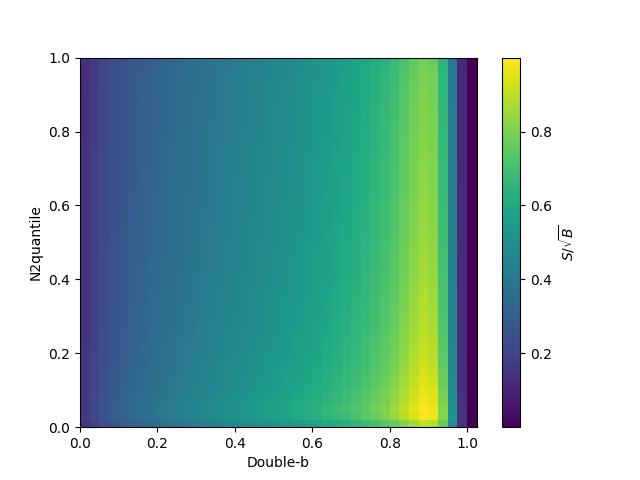

In [58]:
htemp = z.project("process")
htemp.clear()
htemp.label = '$S/\sqrt{B}$'
htemp._sumw = {():norm_soverb}
fig, ax, _ = plot.plot2d(htemp, xaxis="AK8Puppijet0_deepdoubleb", xoverflow='over', patch_opts={})

In [25]:
fig.savefig("plots/quantile_optmization_binreverse.pdf")


In [1]:
tuples = (1,2,3)

In [2]:
print(tuples)

(1, 2, 3)


In [3]:
tuples = tuples[::-1]

In [4]:
print(tuples)

(3, 2, 1)


<IPython.core.display.Javascript object>


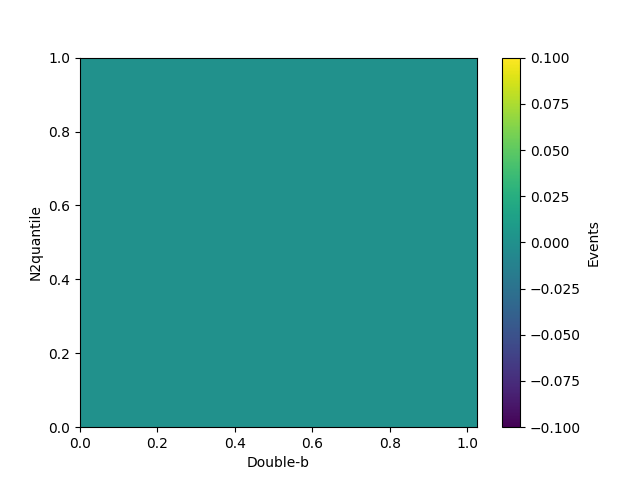

In [24]:
htemp2 = z.project("process")
fig2, ax2, _ = plot.plot2d(htemp2, xaxis="AK8Puppijet0_deepdoubleb", xoverflow='over', patch_opts={})

In [27]:
a = np.array([[7, -1, 3], [1, -2, 4], [10, 1, 5]])

In [28]:
print(a)

[[ 7 -1  3]
 [ 1 -2  4]
 [10  1  5]]


In [29]:
b = multidim_cumsum(a)

In [30]:
print(b)

[[ 9  2  3]
 [12  4  7]
 [28 10 12]]


In [31]:
tt = z.project("process").values(overflow='allnan')


In [32]:
print(tt)

{(): array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.4228503e+05, 1.6998855e+05, ..., 7.0690361e+01,
        0.0000000e+00, 2.1824028e+01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)}


In [39]:
print(hists)

{'hjetpt': <Hist (process,AK8Puppijet0_pt,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f78b43c3208>}
